# **Proyecto 1 - Ecuación de Calor**
# Geometría Diferencial Discreta
Miguel Ruiz & Franklin Echeverría

---





# Resolución de la ecuación del calor escalar 
$$
\frac{d \rho }{dt} = \frac{d^2\rho}{dx^2},
$$
donde $\rho:[a,b]\times \mathbb{R} \to \mathbb{R}$ y $\rho(a,t)=\rho(b,t)$, para todo $t\in \mathbb{R}$.

Notemos 
$$
\rho(\cdot, t_{i+1}) - \rho(\cdot, t_{i}) = \int_{t_i}^{t_{i+1}} \frac{d \rho }{dt}(\cdot, t)dt = \int_{t_i}^{t_{i+1}} \frac{d^2\rho}{dx^2}(\cdot, t)dt \approx (\Delta t)\frac{d^2\rho}{dx^2}(\cdot, t_{i+1}), \quad\quad (\star)
$$
donde la última aproximación es usando el método del rectángulo con base $\Delta t = t_{i+1}-t_i$ y altura $\frac{d^2\rho}{dx^2}(\cdot, t_{i+1})$.



Si discretizamos la función $\rho(\cdot, t_{i})$ como un vector $\rho^i=(\rho_0, \ldots, \rho_n)\in \mathbb{R}^{n+1}$, y utilizamos la hipótesis de que $\rho(\cdot, t)$ es periódica, tenemos la aproximación de $\frac{d^2\rho}{dx^2}(\cdot, t_i)$  como un vector en $\mathbb{R}^{n+1}$ dado por
$$
\frac{d^2 \rho}{dx^2}(\cdot, t_i) \approx \frac{1}{(\Delta x)^2}\begin{pmatrix}
-2 & 1 & 0 & 0 & \ldots & 0 & 0 & 1 \\
1 & -2 & 1 & 0 & \ldots & 0 & 0 & 0 \\
\vdots &   & \ddots &  & \ddots &  &  & \vdots \\
0 & 0 & 0 & 0 & \ldots & 1 & -2 & 1 \\
1 & 0 & 0 & 0 & \ldots & 0 & 1 & -2
\end{pmatrix} \rho^i = \Delta \; \rho^i,
$$
donde $\Delta$ es la matriz Laplaciana (no confundir la matriz $\Delta$ con el símbolo de incremento en $\Delta x$ y $\Delta t$).

Sustituyendo lo anterior en la ecuación $(\star)$, obtenemos
$$
\frac{\rho^{i+1}-\rho^i}{\Delta t} = \Delta \; \rho^{i+1}.
$$

Reacomodando la ecuación anterior, obtenemos el Método de Euler implícito aplicado a la ecuación del calor escalar:
$$
  (I-(\Delta t) \Delta)\rho^{i+1} = \rho^i,
$$
$I$ es la matriz identidad de $(n+1)\times (n+1)$, y $\rho^0$ es la función inicial al tiempo 0. De manera que dado $\rho^i$, basta resolver la ecuación anterior de la forma $Ax=b$, donde $A=I-(\Delta t) \Delta$ es una matriz de $(n+1)\times (n+1)$ y $b=\rho^i \in \mathbb{R}^{n+1}$.


# Simulación

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

# Variables

a = -1             # Intervalo
b = 1              # Intervalo
n = 100            # Numero de puntos a graficar
delta_x = (b-a)/n  # Salto en x 
delta_t = 0.01     # Salto en tiempo
niter = 50         # Numero de iteraciones en el tiempo


# Matriz del Laplaciano

Delta = np.zeros([n+1,n+1])

Delta[0][0] = -2
Delta[0][1] = 1
Delta[0][n] = 1

Delta[n][0] = 1
Delta[n][n] = -2
Delta[n][n-1] = 1

for i in range(1,n):
  Delta[i][i-1] = 1
  Delta[i][i]= - 2
  Delta[i][i+1] = 1

Delta = (1/delta_x**2)*Delta 


# Matriz del sistema de ecuaciones a resolver

A = np.identity(n+1)-delta_t*Delta

# Primera prueba

In [ ]:
# Condiciones iniciales

# Funcion con condiciones periodicas en la frontera (rho)
def funcion1(x):
  if(x<=(a+b)/2):
    return x
  return -x+b+a

# Funcion inicial rho en tiempo 0
rho_t = np.zeros(n+1)
for i in range(n+1):
  rho_t[i] = funcion1(a+i*delta_x)

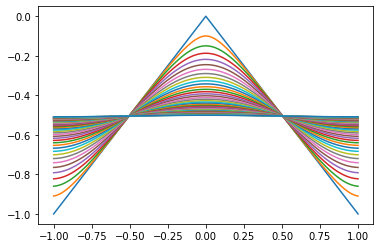

In [ ]:
# Grafica conjunta

x = np.arange(a,b+delta_x,delta_x)

for t in range(niter+1):
  plt.plot(x, rho_t)
  # Se resuelve el sistema de ecuaciones para encontrar siguiente iteracion
  rho_t = np.linalg.solve(A, rho_t)

plt.show()


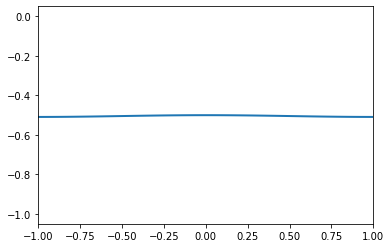

In [ ]:
# Animacion

# Se inicializa el vector a rho en tiempo 0 
rho_t = np.zeros(n+1)
for i in range(n+1):
  rho_t[i] = funcion1(a+i*delta_x)

# Se prepara la grafica
fig = plt.figure()
ax = plt.axes(xlim=(a,b), ylim=(min(rho_t)-0.05, max(rho_t)+0.05))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

# Funcion iterativa para animacion
def animar(i):
    global rho_t, x
    line.set_data(x, rho_t)
    rho_t = np.linalg.solve(A, rho_t)
    return line,

# Grafica animada y ultima iteracion
anim = animation.FuncAnimation(fig, animar, init_func=init, frames=niter, interval=100, blit=True)
anim

# Segunda prueba

In [ ]:
# Condiciones iniciales

# Funcion con condiciones periodicas en la frontera (rho)
def funcion2(x):
  mu = (a+b)/2
  return math.exp(-(x-mu)**2)

# Funcion inicial rho en tiempo 0
rho_t = np.zeros(n+1)
for i in range(n+1):
  rho_t[i] = funcion2(a+i*delta_x)

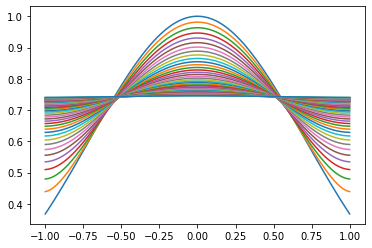

In [ ]:
# Grafica conjunta

x = np.arange(a,b+delta_x,delta_x)

for t in range(niter+1):
  plt.plot(x, rho_t)
  rho_t = np.linalg.solve(A, rho_t)

plt.show()

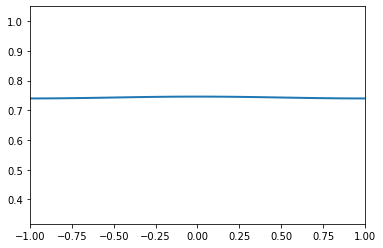

In [ ]:
# Animacion

# Se inicializa el vector a rho en tiempo 0 
rho_t = np.zeros(n+1)
for i in range(n+1):
  rho_t[i] = funcion2(a+i*delta_x)

# Se prepara la grafica
fig = plt.figure()
ax = plt.axes(xlim=(a,b), ylim=(min(rho_t)-0.05, max(rho_t)+0.05))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

# Funcion iterativa para animacion
def animar(i):
    global rho_t, x
    line.set_data(x, rho_t)
    rho_t = np.linalg.solve(A, rho_t)
    return line,

# Grafica animada y ultima iteracion
anim = animation.FuncAnimation(fig, animar, init_func=init, frames=niter, interval=100, blit=True)
anim